In [2]:
from optimization.core.buses import bus_30_only

opt1 = bus_30_only()

print(f"We need {opt1['num_buses_30']} 30-seaters buses")
print(f"We need {opt1['num_buses_40']} 40-seaters buses")
print(f"Minimum total cost: {opt1['minimum_total_cost']}€")

We need 10 30-seaters buses
We need 0 40-seaters buses
Minimum total cost: 4000€



### **Option 4**: Iterative algorithm

What if our hypothesis is wrong and there is a better solution? For all optimisation problems, one solution, often prohibitive, is to enumerate all possible solutions, and find the best. 

- Number of 30-seat buses: 2
- Number of 40-seat buses: 7
- Total cost: 4300€

We just saved 100€ on the best solution so far. Unfortunately for practical problems, this option is very costly.

In [13]:
from optimization.core.buses import iterative_solution

opt4 = iterative_solution()

### Option 5: Linear programming
    
This is a method to achieve the best outcome in a mathematical model whose requirements and objective are represented by linear relationships.
We need to introduce a cost function: 
  
$$ f(x,y) = xX + yY $$

where (x,y) are the number of 30- and 40- seaters respectively, and (X, Y) are their unitary price. 

We will prefer the `pulp` library to the most common `scipy.optimize.linprog` since the latter does not directly support integer programming, which includes constraining variables to be integers. 

In [6]:
from optimization.core.buses import linear_programming

opt5 = iterative_solution()

print(f"We need {opt5['num_buses_30']} 30-seaters buses")
print(f"We need {opt5['num_buses_40']} 40-seaters buses")
print(f"Minimum total cost: {opt5['minimum_total_cost']}€")

We need 1 30-seaters buses
We need 6 40-seaters buses
Minimum total cost: 3400€


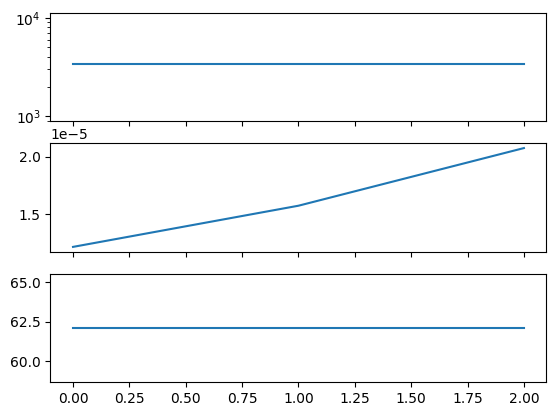

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1, sharex=True)


ax[0].semilogy([ opt['minimum_total_cost'] for opt in  [opt3, opt4, opt5] ])
ax[1].plot([ opt['execution_time'] for opt in  [opt3, opt4, opt5] ])
ax[2].plot([ opt['max_memory'] for opt in  [opt3, opt4, opt5] ])